## Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Create a Linear predictive model

In [2]:
data: pd.DataFrame = pd.read_csv('new_merged_data.csv')
numeric_columns = data.select_dtypes(include=['number'])
data = data.drop(columns=data.columns.difference(numeric_columns.columns))

data.info()

X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# print the scores
print(f"Training RMSE: {train_mse}")
print(f"Testing RMSE: {test_mse}")
print(f"training r2: {train_r2}")
print(f"testing r2: {test_r2}")

#Regression coefficients
coefficients = linear_model.coef_
print(f"Regression coefficients: {coefficients}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421554 entries, 0 to 421553
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      421554 non-null  int64  
 1   Store           421554 non-null  int64  
 2   Dept            421554 non-null  int64  
 3   Weekly_Sales    421554 non-null  float64
 4   Temperature     421554 non-null  float64
 5   Fuel_Price      421554 non-null  float64
 6   MarkDown1       421554 non-null  float64
 7   MarkDown2       421554 non-null  float64
 8   MarkDown3       421554 non-null  float64
 9   MarkDown4       421554 non-null  float64
 10  MarkDown5       421554 non-null  float64
 11  CPI             421554 non-null  float64
 12  Unemployment    421554 non-null  float64
 13  Size            421554 non-null  int64  
 14  total_markdown  421554 non-null  float64
 15  Negative_count  421554 non-null  int64  
 16  Small_count     421554 non-null  int64  
 17  moderate_c

## decicion tree

Max Depth: 3
Training R-squared: 0.8602794887147502
Test R-squared: 0.8595027362451639
Max Depth: 5
Training R-squared: 0.8828491005402589
Test R-squared: 0.8828550098696972
Max Depth: 7
Training R-squared: 0.8999744832173124
Test R-squared: 0.8976682889598987
Max Depth: 10
Training R-squared: 0.933680381492266
Test R-squared: 0.9255976717498322


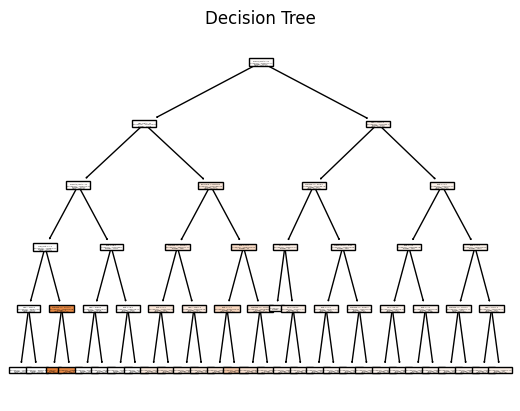

In [3]:
max_depth_values = [3, 5, 7, 10]

for max_depth in max_depth_values:
    tree_model = DecisionTreeRegressor(max_depth=max_depth)
    tree_model.fit(X_train, y_train)

    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f'Max Depth: {max_depth}')
    print(f'Training R-squared: {train_r2}')
    print(f'Test R-squared: {test_r2}')
    
best_max_depth = 5  
best_tree_model = DecisionTreeRegressor(max_depth=best_max_depth)
best_tree_model.fit(X_train, y_train)

feature_names = X.columns.tolist() 
plot_tree(best_tree_model, filled=True, feature_names=feature_names)
plt.title("Decision Tree")
plt.show()

## Confusion matrix

In [4]:
# confusion = confusion_matrix(y_test, y_test_pred)
# print(confusion)

## KNN predictive model

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421549      508.37
421550      628.10
421551     1061.02
421552      760.01
421553     1076.80
Name: Weekly_Sales, Length: 421554, dtype: float64
Mean Squared Error: 183536006.58323082
R-squared (R2): 0.6420309773374642
295087 126467 295087 126467


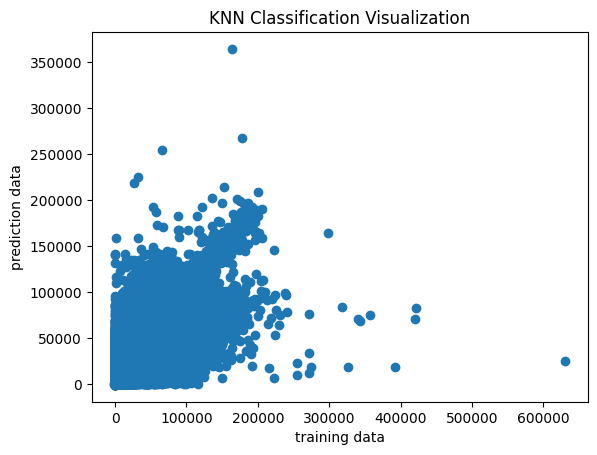

In [5]:
data: pd.DataFrame = pd.read_csv('new_merged_data.csv')
numeric_columns = data.select_dtypes(include=['number'])
data = data.drop(columns=data.columns.difference(numeric_columns.columns))

X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

# print(X.info())
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


print(len(y_train), len(y_pred), len(X_train), len(X_test))
plt.scatter(y_test, y_pred)
plt.xlabel("training data")
plt.ylabel("prediction data")
plt.title("KNN Classification Visualization")
plt.show()

## KNN regression visualization

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Perform cross-validation on the training set to fine-tune k
k_values = [3, 5, 7, 9, 11]  # List of k values to try
best_k = None
best_mse = float('inf')

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = scores.mean()

    if mean_mse < best_mse:
        best_mse = mean_mse
        best_k = k

# Train the final model on the training set with the best k
final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# Make predictions on the validation set
y_validation_pred = final_knn.predict(X_validation)

# Evaluate the final model on the validation set
mse = mean_squared_error(y_validation, y_validation_pred)
r2 = r2_score(y_validation, y_validation_pred)
print(f"Validation MSE: {mse}")
print(f"Validation R-squared (R2): {r2}")

# Make predictions on the test set and evaluate the final model
y_test_pred = final_knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test R-squared (R2): {test_r2}")

Validation MSE: 180127071.58933657
Validation R-squared (R2): 0.652494844161855
Test MSE: 181819238.0128161
Test R-squared (R2): 0.6414374294995434
